In [1]:
import h5py
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

fpath = 'C:/crs/proj/2021_Outer_Cape_Bars/test_tide/HoM_ADCIRC_tide_predictions.mat'

with h5py.File(fpath) as f:
    keys = list(f.keys())
    print('Keys: ',keys)
    lat = f.get('lat')[:]
    lon = f.get('lon')[:]
    T = f.get('T')[:]
    tid = f.get('tid')[:]

print('lat,lon:',lat,lon)

Keys:  ['T', 'lat', 'lon', 'tid']
lat,lon: [[42.061859]] [[-70.08176]]


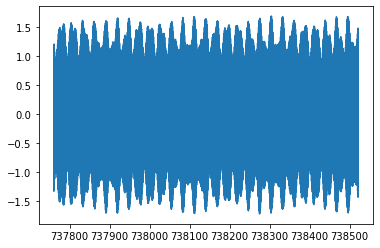

In [2]:
# plot with datenum on x axis   
plt.plot(T,tid)

In [3]:
def datenum_to_datetime(datenum):
    """
    Convert Matlab datenum into Python datetime
    :param datenum: Date in datenum format
    :return:        Datetime object corresponding to datenum
    
    Slightly modified from https://gist.github.com/victorkristof/b9d794fe1ed12e708b9d
    """
    days = datenum % 1
    hours = days % 1 * 24
    minutes = hours % 1 * 60
    seconds = minutes % 1 * 60
    return dt.datetime.fromordinal(int(datenum)) \
           + dt.timedelta(days=int(days)) \
           + dt.timedelta(hours=int(hours)) \
           + dt.timedelta(minutes=int(minutes)) \
           + dt.timedelta(seconds=int(np.round(seconds))) \
           - dt.timedelta(days=366)

In [4]:
# Convert Matlab datenum array to Python datetime array
dts = [datenum_to_datetime(tval) for tval in T]
print(dts[0])
print(dts[-1])

2019-12-01 00:00:00
2021-12-31 00:00:00


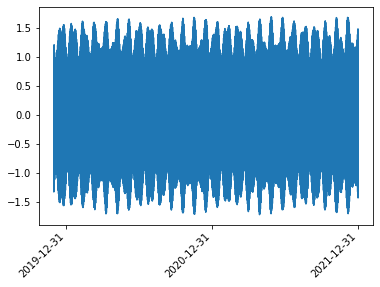

In [5]:
# Short list of dates to label x axis
dates=['2019-12-31','2020-12-31','2021-12-31']
dates_list = [dt.datetime.strptime(date, "%Y-%m-%d").date() for date in dates]
dates_list

# Replot with datetime values on x axis
fig, ax = plt.subplots(1,1)
ax.plot(dts,tid)
ax.set_xticks(dates_list)
_ = ax.set_xticklabels(dates_list,rotation=45,ha='right')